# HouseSales in KingCounty, USA

data sources:https://www.kaggle.com/harlfoxem/housesalesprediction

tutorial sources: Coursera - Data Analysis with Python

data descriptions: https://rstudio-pubs-static.s3.amazonaws.com/155304_cc51f448116744069664b35e7762999f.html

id - Unique ID for each home sold

date - Date of the home sale

price - Price of each home sold

bedrooms - Number of bedrooms

bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower

sqft_living - Square footage of the apartments interior living space

sqft_lot - Square footage of the land space

floors - Number of floors

waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not

view - An index from 0 to 4 of how good the view of the property was

condition - An index from 1 to 5 on the condition of the apartment,

grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.

sqft_above - The square footage of the interior housing space that is above ground level

sqft_basement - The square footage of the interior housing space that is below ground level

yr_built - The year the house was initially built

yr_renovated - The year of the house’s last renovation

zipcode - What zipcode area the house is in

lat - Lattitude

long - Longitude

sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors

sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from scipy import stats

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score,cross_val_predict

In [2]:
%matplotlib inline
sns.set()

In [3]:
housesales = pd.read_csv('/kcsales/kc_house_data.csv')

In [4]:
housesales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
housesales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
# delete useless columns
housesales.drop(['id'],axis=1,inplace=True)

In [7]:
# change datatypes
housesales['date']=pd.to_datetime(housesales['date']).dt.strftime('%Y-%m')
housesales['zipcode']=housesales['zipcode'].astype(object)

In [8]:
housesales.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text major ticklabel objects>)

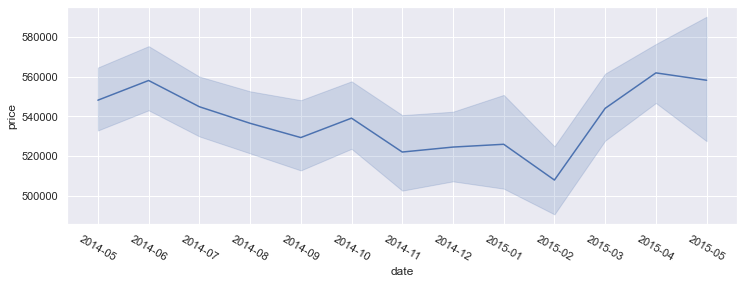

In [9]:
# date
fig = plt.figure(figsize=(12,4)) 
sns.lineplot(x='date',y='price',data=housesales)
plt.xticks(rotation=-30)

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64


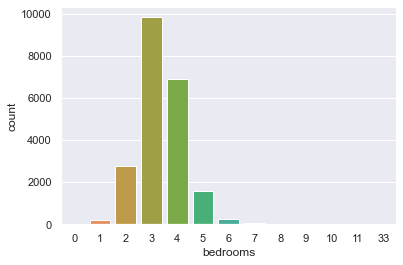

In [10]:
# bedrooms
print(housesales['bedrooms'].value_counts())
sns.countplot(housesales['bedrooms'])

from the graph of bedrooms, there is one value of 33 bedrooms, which is extreme and can be deleted. 75% of houses have no more than 4 bedrooms.

In [11]:
housesales.drop(housesales[housesales['bedrooms']>30].index,axis=0,inplace=True)

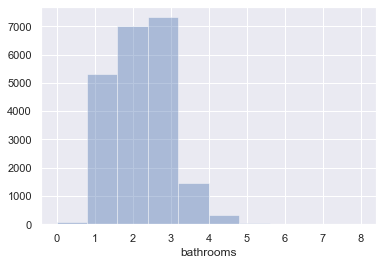

In [12]:
# bathrooms
housesales['bathrooms'].value_counts()
sns.distplot(housesales['bathrooms'],bins=10,kde=False)

More than 75% of houses have no more than 3 bathrooms.

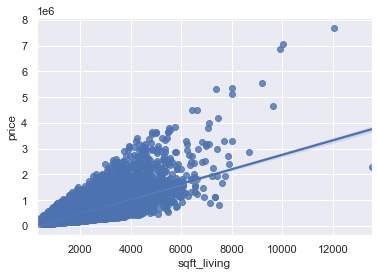

In [13]:
# sqft_living
sns.regplot(x='sqft_living',y='price',data=housesales)

We can see, the sqft_living and price has a positive relationship. We can calculate the correlation and p_value for them. There is a value, whose sqft_living more than 12000, but price is lower. Maybe we can delete it.

In [14]:
# delete the extrme value and calculate the correlation between sqft_living and price
housesales.drop(housesales['sqft_living'].argmax(),axis=0,inplace=True)
person_coef,p_value = stats.pearsonr(housesales['sqft_living'],housesales['price'])
print('the correlation between sqft_living and price is ',person_coef,'and the p_value is ',p_value)

the correlation between sqft_living and price is  0.7022080388332672 and the p_value is  0.0


the correlation between sqft_lot and price is  0.08826230313013728 and the p_value is  1.2268906500469616e-38


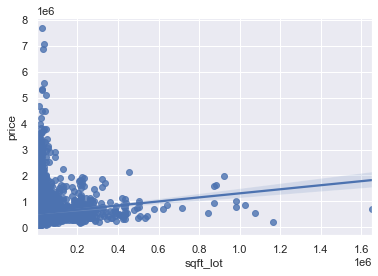

In [15]:
# sqft_lot
sns.regplot(x='sqft_lot',y='price',data=housesales)
person_coef,p_value = stats.pearsonr(housesales['sqft_lot'],housesales['price'])
print('the correlation between sqft_lot and price is ',person_coef,'and the p_value is ',p_value)

It seems like that price is the sqft_lot's power function result, y=x^a(a<0). 
They are not significantly correlated.

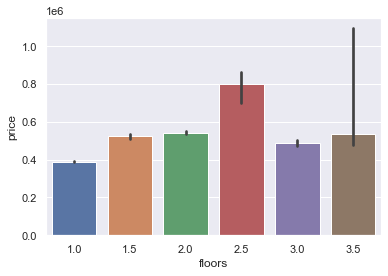

In [16]:
# floors
sns.barplot(x='floors',y='price',data=housesales,estimator=np.median)

The floors with 2.5 have higher median of prices than others, which are mostly similar.

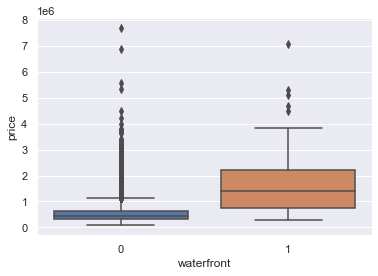

In [17]:
# waterfront
sns.boxplot(x='waterfront',y='price',data=housesales)

The distribution of prices between different waterfront, 0 or 1, are significantly different, which the 1s have higher prices. Maybe waterfront is a good predicter.

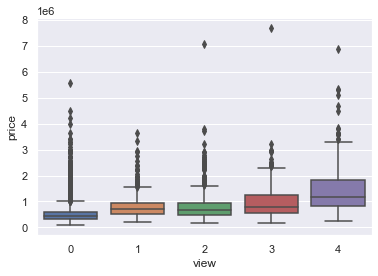

In [18]:
# view
sns.boxplot(x='view',y='price',data=housesales)

The houses with 1 and 2 in view field have similar prices, higher than 0. About 50% of houses with 4 have higher prices than 0,1,2,3. In general, houses with better views have higher prices.

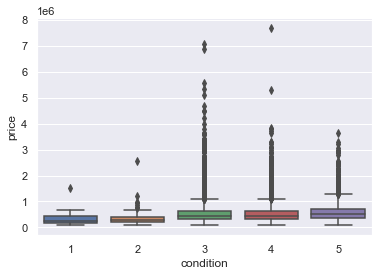

In [19]:
# condition
sns.boxplot(x='condition',y='price',data=housesales)

The distribution of prices in different conditions are not significantly different, so maybe condition is not a good variable for the prediction of price.

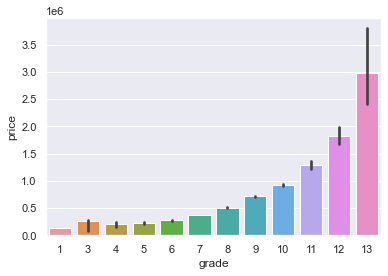

In [20]:
# grade
sns.barplot(x='grade',y='price',data=housesales,estimator=np.median)

From the graph, we can see, as the median of grade becomes higher, the price also becomes higher. Maybe it is a good feature.

the correlation between sqft_above and price is  0.605073712487175 and the p_value is  0.0


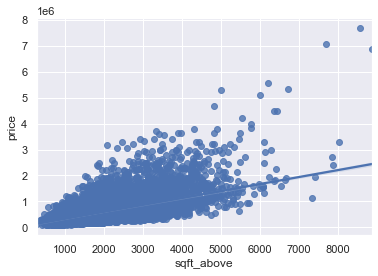

In [21]:
# sqft_above
sns.regplot(x='sqft_above',y='price',data=housesales)
person_coef,p_value = stats.pearsonr(housesales['sqft_above'],housesales['price'])
print('the correlation between sqft_above and price is ',person_coef,'and the p_value is ',p_value)

The correlation is about 0.60, and p_value is 0.0. We can say, the sqft_above and price have significantly positive relationship, which is also shown in the graph.

the correlation between sqft_basement and price is  0.32263895236370344 and the p_value is  0.0


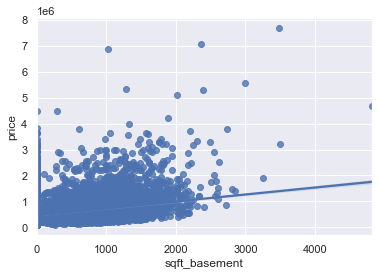

In [22]:
# sqft_basement
sns.regplot(x='sqft_basement',y='price',data=housesales)
person_coef,p_value = stats.pearsonr(housesales['sqft_basement'],housesales['price'])
print('the correlation between sqft_basement and price is ',person_coef,'and the p_value is ',p_value)

The correlation between sqft_basement and price is less than 0.5, but significantly positive. Maybe we can cconsider it in the modeling.

(array([1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000,
        2010, 2020]),
 <a list of 13 Text major ticklabel objects>)

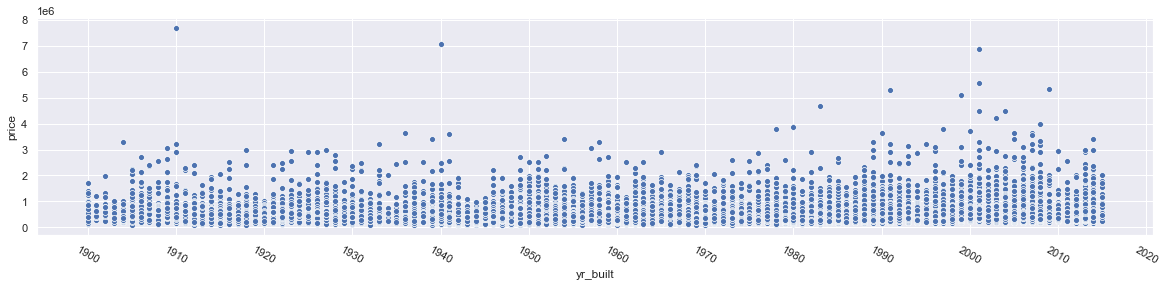

In [23]:
# yr_built
fig = plt.figure(figsize=(20,4)) 
ax = sns.scatterplot(x='yr_built',y='price',data=housesales)
ax.set_xticks(np.arange(1900,2030,10))
plt.xticks(rotation=-30)

From the scatterplot between yr_built and price, we see: there are 2 extrme values in 1910 and 1940, whose prices are much higher than others, more than 7000000. We can find them out and check the reason.
Maybe the reason is the grades of these 2 data are better than others in the same year.

In [24]:
housesales[housesales['price']>7000000]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3914,2014-06,7062500.0,5,4.5,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
7252,2014-10,7700000.0,6,8.0,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800


In [25]:
price1910 = housesales[(housesales['yr_built']==1910) & (housesales['price']<700000)]
price1910.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.0,95.000000,95.000000,95.000000,95.000000,95.000000,95.0,95.000000,95.000000,95.000000,95.000000,95.000000
mean,446401.631579,2.663158,1.460526,1443.400000,7396.336842,1.326316,0.0,0.157895,3.494737,6.631579,1189.084211,254.315789,1910.0,188.400000,47.598921,-122.325516,1559.473684,5712.357895
std,143617.329204,0.870443,0.625602,568.846414,17828.318031,0.377340,0.0,0.606977,0.797252,0.619757,394.055906,388.531476,0.0,585.507243,0.088586,0.117715,325.865030,5589.946064
min,150000.000000,1.000000,0.500000,680.000000,1638.000000,1.000000,0.0,0.000000,1.000000,5.000000,500.000000,0.000000,1910.0,0.000000,47.306500,-122.472000,930.000000,1438.000000
25%,350000.000000,2.000000,1.000000,980.000000,3288.000000,1.000000,0.0,0.000000,3.000000,6.000000,920.000000,0.000000,1910.0,0.000000,47.556650,-122.378000,1335.000000,3976.000000
50%,450000.000000,3.000000,1.000000,1280.000000,4500.000000,1.500000,0.0,0.000000,3.000000,7.000000,1090.000000,0.000000,1910.0,0.000000,47.610100,-122.352000,1500.000000,4600.000000
75%,550000.000000,3.000000,2.000000,1735.000000,5980.000000,1.500000,0.0,0.000000,4.000000,7.000000,1370.000000,490.000000,1910.0,0.000000,47.673600,-122.301500,1765.000000,6000.000000
max,682000.000000,5.000000,3.750000,3370.000000,169448.000000,3.000000,0.0,4.000000,5.000000,8.000000,3136.000000,1230.000000,1910.0,2014.000000,47.712500,-121.364000,2540.000000,54450.000000


In [26]:
price1940 = housesales[(housesales['yr_built']==1940) & (housesales['price']<700000)]
price1940.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,129.000000,129.000000,129.000000,129.000000,129.00000,129.000000,129.0,129.000000,129.000000,129.000000,129.000000,129.000000,129.0,129.000000,129.000000,129.000000,129.000000,129.000000
mean,433756.131783,2.922481,1.620155,1573.534884,10997.24031,1.158915,0.0,0.232558,3.527132,6.821705,1244.465116,329.069767,1940.0,139.666667,47.608181,-122.310364,1632.193798,10458.728682
std,146652.735907,0.923753,0.673219,577.077525,23746.30056,0.312403,0.0,0.701690,0.685537,0.678344,445.519045,399.541616,0.0,511.985021,0.115849,0.098386,389.844081,32450.175512
min,135000.000000,1.000000,1.000000,660.000000,2300.00000,1.000000,0.0,0.000000,2.000000,5.000000,660.000000,0.000000,1940.0,0.000000,47.196300,-122.412000,460.000000,1413.000000
25%,345000.000000,2.000000,1.000000,1120.000000,5400.00000,1.000000,0.0,0.000000,3.000000,6.000000,930.000000,0.000000,1940.0,0.000000,47.533500,-122.376000,1370.000000,5363.000000
50%,440000.000000,3.000000,1.500000,1480.000000,6656.00000,1.000000,0.0,0.000000,3.000000,7.000000,1080.000000,130.000000,1940.0,0.000000,47.665300,-122.330000,1600.000000,6600.000000
75%,547500.000000,3.000000,2.000000,1940.000000,9265.00000,1.000000,0.0,0.000000,4.000000,7.000000,1470.000000,640.000000,1940.0,0.000000,47.697000,-122.289000,1840.000000,8000.000000
max,690000.000000,6.000000,4.250000,2980.000000,250470.00000,2.500000,0.0,3.000000,5.000000,9.000000,2910.000000,1300.000000,1940.0,2015.000000,47.762400,-121.893000,2720.000000,360000.000000


In [27]:
# yr_renovated
print('The persentage of yr_renovated with zero is ',(housesales['yr_renovated']==0).sum()/housesales['yr_renovated'].count())

The persentage of yr_renovated with zero is  0.957706723427884


More than 95% of houses have 0 year_renovated, which means none. (since we don't know the exact data description, none is just the guess.)

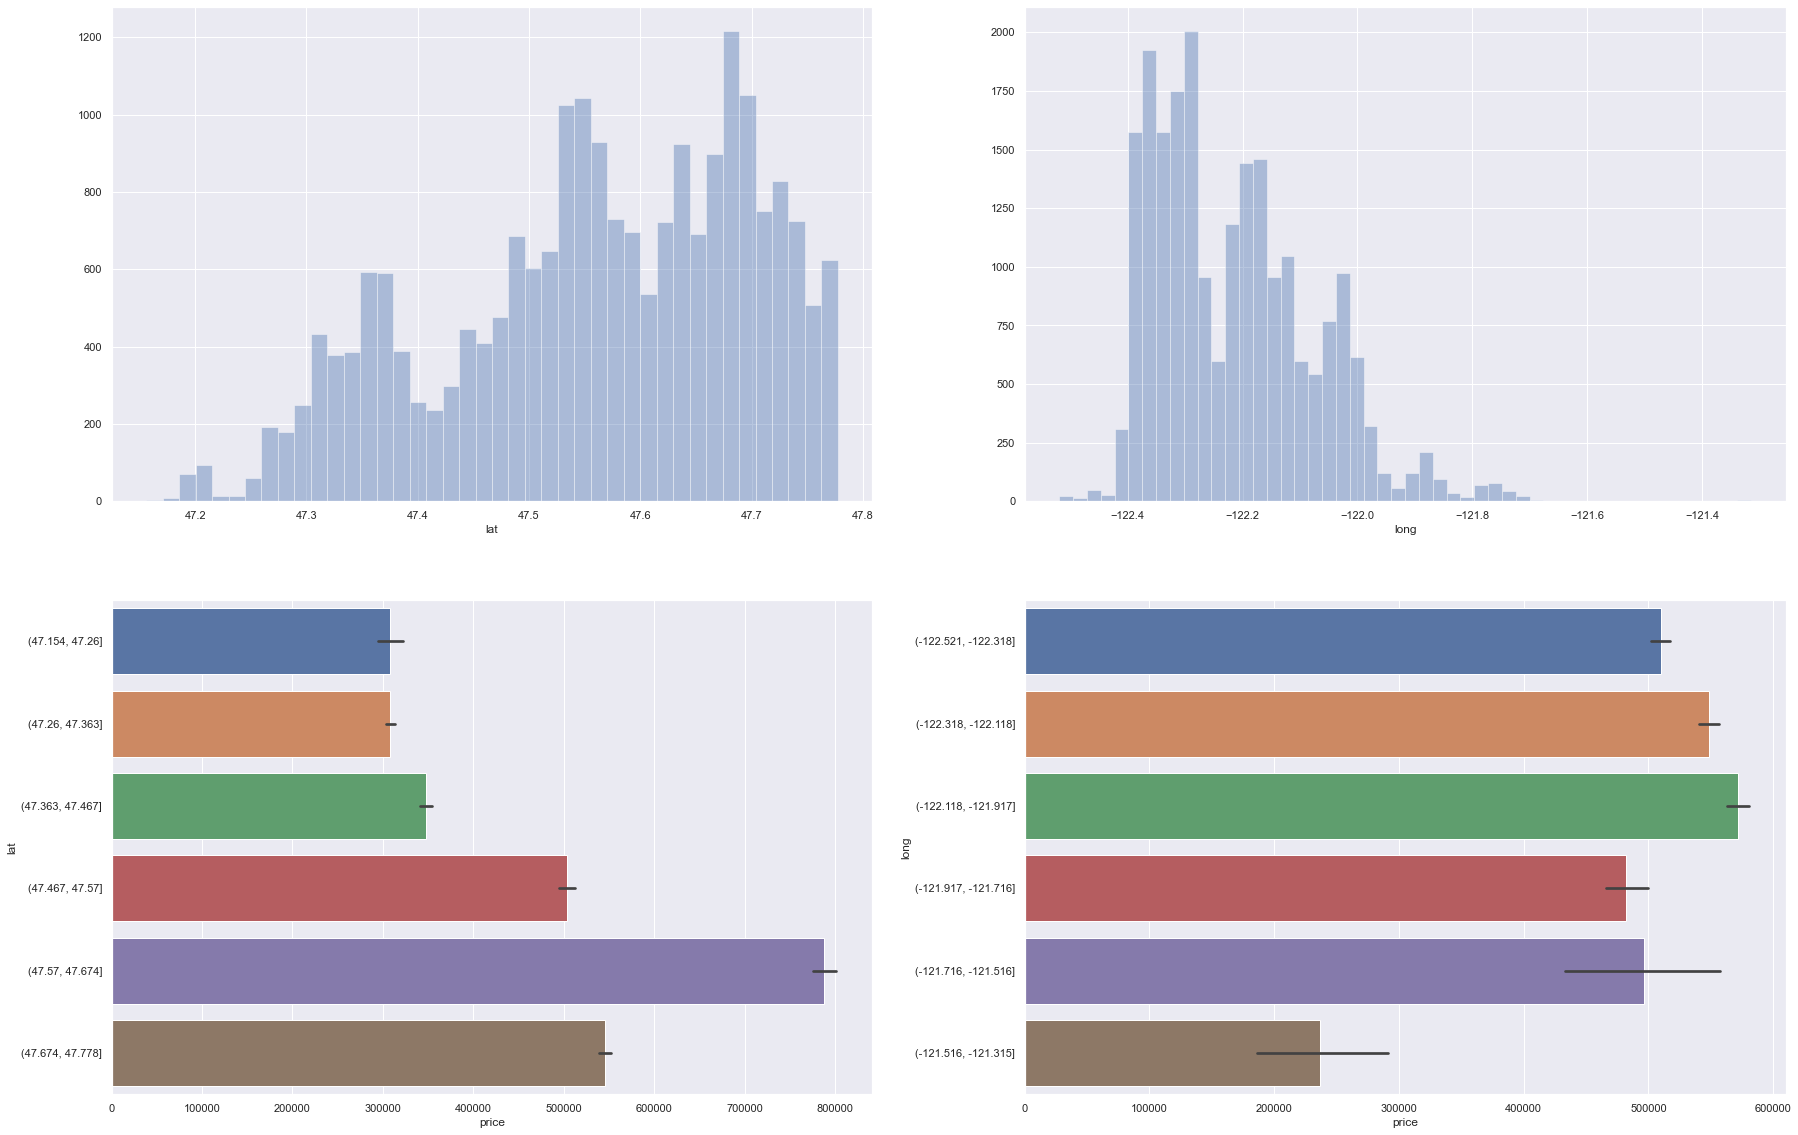

In [28]:
# lat & long
fig = plt.figure(figsize=(30,20)) 
plt.subplot(2,2,1)
sns.distplot(housesales['lat'],kde=False)
plt.subplot(2,2,2)
sns.distplot(housesales['long'],kde=False)
plt.subplot(2,2,3)
sns.barplot(housesales['price'],pd.cut(housesales['lat'],bins=6,labels=None,include_lowest=True))
#plt.xticks(rotation=-30)
plt.subplot(2,2,4)
sns.barplot(housesales['price'],pd.cut(housesales['long'],bins=6,labels=None,include_lowest=True))
#plt.xticks(rotation=-30)

We can see that: the houses with lattitude between 47.57 to 47.674 have the highest average of prices, and with longitube between -121.516 to -121.315 have the lowest average of prices

In [29]:
# add interesting houses in a map
#latlong = housesales[['lat','long']]
#mapit = folium.Map(location=[47.560053, -122.257])

#for i in range(len(latlong)): 
#    folium.Marker(location=[latlong.loc[i,'lat'],latlong.loc[i,'long']], fill_color='#43d9de', radius=8).add_to(mapit)

#folium.Marker(location=[47.5112,-122.257], fill_color='#43d9de', radius=8).add_to(mapit)
#mapit

the correlation between sqft_living15 and price is  0.5850284689349652 and the p_value is  0.0


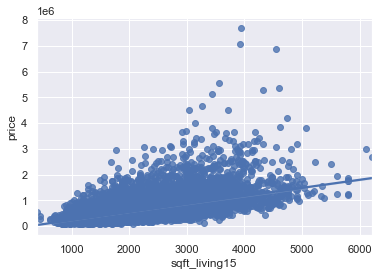

In [30]:
# sqft_living15
sns.regplot(x='sqft_living15',y='price',data=housesales) #lmplot
person_coef,p_value = stats.pearsonr(housesales['sqft_living15'],housesales['price'])
print('the correlation between sqft_living15 and price is ',person_coef,'and the p_value is ',p_value)

The sqft_living15 may be a good predictor, since it has significantly positive correlation with price.

the correlation between sqft_lot15 and price is  0.08095212827243917 and the p_value is  9.37922939580571e-33


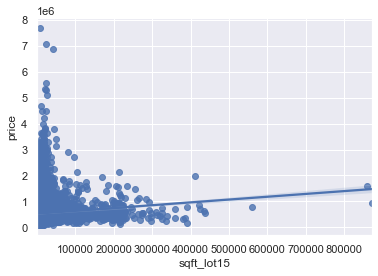

In [31]:
# sqft_lot15
sns.regplot(x='sqft_lot15',y='price',data=housesales)
person_coef,p_value = stats.pearsonr(housesales['sqft_lot15'],housesales['price'])
print('the correlation between sqft_lot15 and price is ',person_coef,'and the p_value is ',p_value)

en...It is not a good variable.

price            1.000000
bedrooms         0.314848
bathrooms        0.524453
sqft_living      0.702208
sqft_lot         0.088262
floors           0.256379
waterfront       0.266529
view             0.396649
condition        0.036493
grade            0.667194
sqft_above       0.605074
sqft_basement    0.322639
yr_built         0.053843
yr_renovated     0.126549
lat              0.306992
long             0.021295
sqft_living15    0.585028
sqft_lot15       0.080952
Name: price, dtype: float64


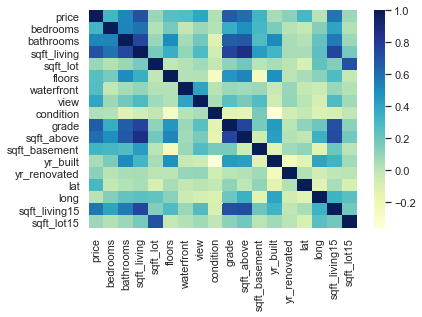

In [32]:
print(housesales.corr()['price'])
sns.heatmap(housesales.corr(),cmap="YlGnBu")

From the correlation among features and prices, and the graphs shown before, the features which are below may be the good predictors of price. So, we choose these to built the model and predict:
- bedrooms
- bathrooms
- sqft_living
- floors
- waterfront
- view
- grade
- sqft_above
- sqft_basement
- lat
- sqft_living15

            label   coefficient
0        bedrooms -2.786852e+04
1       bathrooms -2.186830e+03
2     sqft_living  2.302792e+18
3          floors -1.477017e+04
4      waterfront  5.704716e+04
5            view  5.307574e+04
6           grade  9.262623e+04
7      sqft_above -2.079664e+18
8   sqft_basement -1.111736e+18
9             lat  9.482092e+04
10   sqft_living1  2.163862e+02

The intercept of model is  539728.8931738248
The R-squared of test data is  0.6425447088718839
The MSE is  46083050073.74187


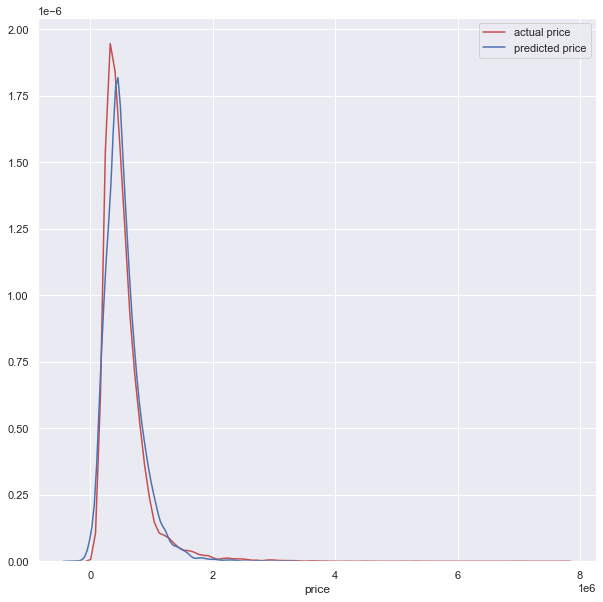

In [52]:
# data modelling
# from sklearn.preprocessing import StandardScaler
X = housesales[['bedrooms','bathrooms','sqft_living','floors','waterfront','view','grade','sqft_above','sqft_basement','lat','sqft_living15']]
y = housesales[['price']]

# Scaling the data
scale = StandardScaler()
X_scale = StandardScaler.fit_transform(scale,X)
X_scale_train,X_scale_test,y_train,y_test = train_test_split(X_scale,y,random_state=0)

# Linear Regression
lm = LinearRegression()
lm.fit(X_scale_train,y_train)
y_estimated = lm.predict(X_scale)

# print the coefficient and intercept
label = ['bedrooms','bathrooms','sqft_living','floors','waterfront','view','grade','sqft_above','sqft_basement','lat','sqft_living1']
coefdf = pd.DataFrame()
coefdf['label'] = label
coefdf['coefficient'] = lm.coef_[0]
print(coefdf)
print('\nThe intercept of model is ',lm.intercept_[0])

# R_squared
print('The R-squared of test data is ',lm.score(X_scale_test,y_test))

# MSE
from sklearn.metrics import mean_squared_error
print('The MSE is ',mean_squared_error(y,y_estimated))

# plot the residual plot
plt.figure(figsize=(10,10))
ax1 = sns.distplot(housesales['price'],hist=False,color='r',label='actual price')
sns.distplot(y_estimated,hist=False,color='b',label='predicted price',ax=ax1)

We can see that the fitted values are reasonably close to the actual values, since the two distributions overlap a bit. However, the distribution of price are different between 0 to 100000, and the R-squared is about 0.64 and MSE is too large.

Therefore, there is definitely some room for improvement.

The next step, we can try fitting a polynomial model to the data instead. 

The R-squared of test data is  0.740285067008879


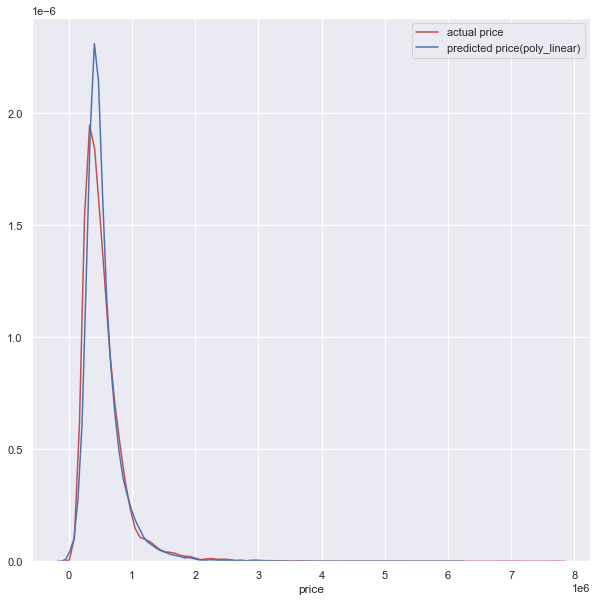

In [54]:
# Polynomial Linear Regression

#from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_scale_poly = PolynomialFeatures.fit_transform(poly,X_scale)

X_scale_poly_train,X_scale_poly_test,y_train,y_test = train_test_split(X_scale_poly,y,random_state=0)

lm.fit(X_scale_poly_train,y_train)
print('The R-squared of test data is ',lm.score(X_scale_poly_test,y_test))

# plot the residual plot
plt.figure(figsize=(10,10))
ax2 = sns.distplot(housesales['price'],hist=False,color='r',label='actual price')
sns.distplot(lm.predict(X_scale_poly),hist=False,color='b',label='predicted price(poly_linear)',ax=ax2)

We can also use the Pipline to create the process of scaling, polynomial transforming and modeling.

In [56]:
# Creat Pipline for scaling the data to perform a polynomial transform
#from sklearn.pipeline import Pipeline

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

Input = [('scale',StandardScaler()),('polynomial',PolynomialFeatures(degree=2,include_bias=False)),('lr',LinearRegression())]
pipe = Pipeline(Input)
pipe.fit(X_train,y_train)
print('The R-squared of test data is ',pipe.score(X_test,y_test))
print(pipe.named_steps['lr'].coef_)

The R-squared of test data is  0.7400524620842557
[[ 3.27162560e+03 -4.34374935e+02  3.21764082e+16 -6.79227627e+02
   2.66062222e+15  2.20802233e+04  9.03604788e+04 -2.89701072e+16
  -1.55121592e+16  7.94046846e+04  2.90633386e+04  2.86422322e+03
  -1.24019523e+04  2.11557970e+15  1.26537246e+04 -2.90393048e+03
   1.09837142e+03  8.69911349e+03 -1.90476731e+15 -1.01991524e+15
   1.51990687e+03  1.40435392e+03  7.07455863e+03 -1.23722873e+15
  -2.16760783e+04  5.04652529e+03  2.80200680e+03  4.74446313e+03
   1.11394189e+15  5.96464616e+14 -4.12129720e+03 -9.10551177e+03
  -4.98631324e+16 -2.89447318e+16  6.48609030e+14  8.77668703e+14
  -1.44292793e+16 -1.99020961e+16  6.38852364e+16 -4.33689944e+15
  -2.28287317e+16  1.67600000e+03 -1.01460000e+04  3.71800000e+03
   1.23600000e+03  2.60604595e+16  1.39541768e+16  4.04650000e+03
  -1.88780469e+04 -2.36397723e+14 -5.69400000e+03 -7.74500000e+03
  -5.83976714e+14 -3.12692656e+14  1.69235000e+04  1.00400000e+04
   3.95700000e+03  6.84450

We can see that the R-squared of the polynomial linear regression is better than linear regression. But the distribution of price in (0-1000000) is still different - the number of fitted values are more than the actual values in this period.

We also see there are some so large coefficients...

Let's try the Ridge regression with standard scale and polynomial linear regression.

The R-squared of test data is  0.7402963633259613
[[  3226.38821621   -421.79628553  52260.17974909   -667.70825645
     447.32599244  22085.7517438   90390.79052931  34817.50208417
   43377.46242185  79407.54605241  29046.34680502   2855.98482765
  -12432.30371318  -6350.50153674  12659.80432606  -2921.47340604
    1098.40766381   8663.27921943  -4771.99877987  -4260.59406894
    1517.5300039    1382.82092889   7099.02654162   8698.98401413
  -21727.53158906   5055.42130005   2818.22355645   4773.94637153
   12591.62221787  -5471.74499823  -4107.77186513  -9088.36082718
    5482.66973156   4405.53535712   9320.23891588  -5644.69853226
   13056.44987242   4339.90784061   3267.43832269   8682.95405771
   -1382.72829277   1681.46859405 -10161.24862019   3715.62308347
    1221.83710297  -3409.01954917  15504.86699577   4029.20875526
  -18860.6994251    5034.58901576  -5698.95237088  -7763.15764897
   10989.3577927   -1190.74750809  16946.71975737  10039.31642665
    3949.48768196   6823.1

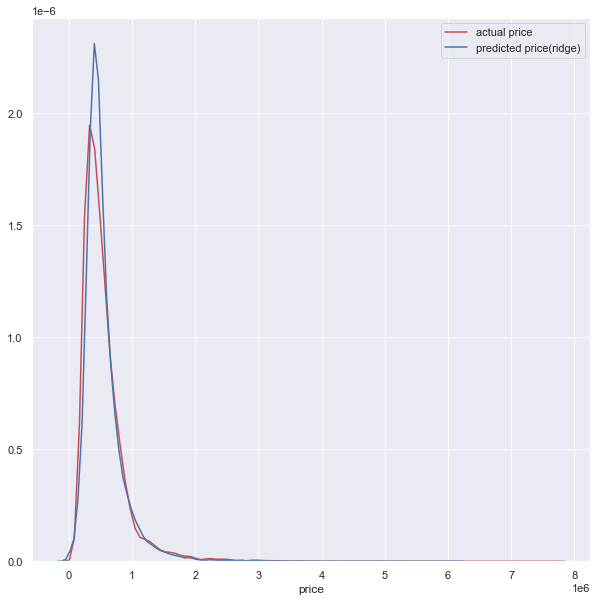

In [57]:
# Redge regression with standard scale and polynomial linear regression - prevents overfitting

# with pipeline
Input_ridge = [('scale',StandardScaler()),('polynomial',PolynomialFeatures(degree=2,include_bias=False)),('ridge',Ridge(alpha=0.1))]
pipe_ridge = Pipeline(Input_ridge)
pipe_ridge.fit(X_train,y_train)
print('The R-squared of test data is ',pipe_ridge.score(X_test,y_test))
print(pipe_ridge.named_steps['ridge'].coef_)

# plot the residual plot
plt.figure(figsize=(10,10))
ax3 = sns.distplot(housesales['price'],hist=False,color='r',label='actual price')
sns.distplot(pipe_ridge.predict(X),hist=False,color='b',label='predicted price(ridge)',ax=ax3)

After using the ridge regression instead of linear regression, we can see the coefficient are much smaller than before, and the R-squared is similar.

In [62]:
# Grid Search to find the best alpha of Ridge regression
#from sklearn.model_selection import GridSearchCV
#parameter = [{'alpha':[0.001,0.01,0.1,1]}]

#ridge = Ridge()
#grid = GridSearchCV(ridge,parameter,cv=5)
#grid.fit(X_scale_poly,y)

#print('The best alpha value is ',grid.best_estimator_)
#print('The R-squared for test data and different alpha is ',grid.cv_results_['mean_test_score'])

In [72]:
# Model evaluation
from sklearn.model_selection import cross_val_score,cross_val_predict

# linear Regression
Rcross_lm = cross_val_score(lm,X_scale,y,cv=5)
print("The mean of the folds(lm) are", Rcross_lm.mean(), "and the standard deviation is" , Rcross_lm.std())

# Polynomial Regression
Rcross_poly = cross_val_score(lm,X_scale_poly,y,cv=5)
print("The mean of the folds(poly_lm) are", Rcross_poly.mean(), "and the standard deviation is" , Rcross_poly.std())

# Ridge+Polynomial
ridge = Ridge(alpha=0.1)
Rcross_ridge = cross_val_score(ridge,X_scale_poly,y,cv=5)
print("The mean of the folds(ridge_poly) are", Rcross_ridge.mean(), "and the standard deviation is" , Rcross_ridge.std())

The mean of the folds(lm) are 0.6546169167152412 and the standard deviation is 0.010731855559379494
The mean of the folds(poly_lm) are 0.7397243392592097 and the standard deviation is 0.015795437202964266
The mean of the folds(ridge_poly) are 0.7399127491087059 and the standard deviation is 0.015963186331172472


From the results of model evaluation, the ridge regression with standardscale and polynomial is better than other models.

So, we can choose it as the final model to predict the house sales price.